In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

##  <font color="grey"><center>Pima Indians Diabetes Database</center></font>

### Attribute Information:

<pre>
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)
</pre>

### Class Variable interpretation:

* class value 1 is interpreted as "tested positive for diabetes"

### Objective:

* To perform basic analysis on the dataset and to classify based on the provided class label



* Import the data from Indian diabetes dataset (Links to an external site.)  and find dataset description from here (Links to an external site.) (2 points)
* Consider all columns as independent variables and assign to variable X except the last column and consider the last column as the dependent variable and assign to variable y. Remove columns which don’t help the problem statement. (1 point)
* Compute some basic statistical details like percentile, mean, standard deviation of dataset (1 point)
* Do Feature Scaling on Independent variables (2 points)
* Split the data into train and test dataset (1 point)
* Use sklearn library to train on train dataset on logistic regression and predict on test dataset  (3 points)
* Compute the accuracy and confusion matrix. (2 points)

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Adding column names to the above dataframe

data.columns = ["num_pregnant", "plasma_conc", "blood_pressure", "skin_thickness", "serum_insulin", \
                "bmi", "diabaties_funcion", "age", "has_diabetes"]

data.head()

,num_pregnant,plasma_conc,blood_pressure,skin_thickness,serum_insulin,bmi,diabaties_funcion,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# to get a basic descreptive stat summary of the data
data.describe()

,num_pregnant,plasma_conc,blood_pressure,skin_thickness,serum_insulin,bmi,diabaties_funcion,age,has_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# checking for null values
data.isnull().sum()

num_pregnant         0
plasma_conc          0
blood_pressure       0
skin_thickness       0
serum_insulin        0
bmi                  0
diabaties_funcion    0
age                  0
has_diabetes         0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   num_pregnant       768 non-null    int64  
 1   plasma_conc        768 non-null    int64  
 2   blood_pressure     768 non-null    int64  
 3   skin_thickness     768 non-null    int64  
 4   serum_insulin      768 non-null    int64  
 5   bmi                768 non-null    float64
 6   diabaties_funcion  768 non-null    float64
 7   age                768 non-null    int64  
 8   has_diabetes       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
x =  data.iloc[:, :-1]
y = data[['has_diabetes']]

## EDA

In [36]:
diabetic_count = data['has_diabetes'].value_counts()[0]
non_diabetic_count = data['has_diabetes'].value_counts()[1]

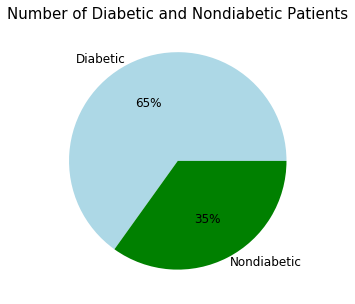

In [38]:
plt.figure(figsize=(5,5))
plt.pie(x=[diabetic_count,non_diabetic_count], labels=[ 'Diabetic', 'Nondiabetic'], autopct='%1.0f%%',pctdistance=0.6,labeldistance=1.05,textprops={'fontsize':12},colors=['lightblue','green'])
plt.title('Number of Diabetic and Nondiabetic Patients',loc='center', fontsize=15)
plt.show()

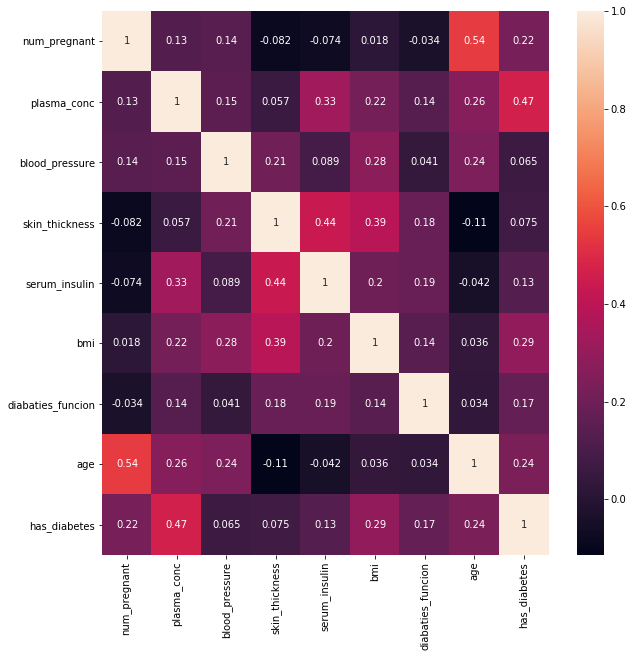

In [44]:
plt.figure(figsize=(10,10))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

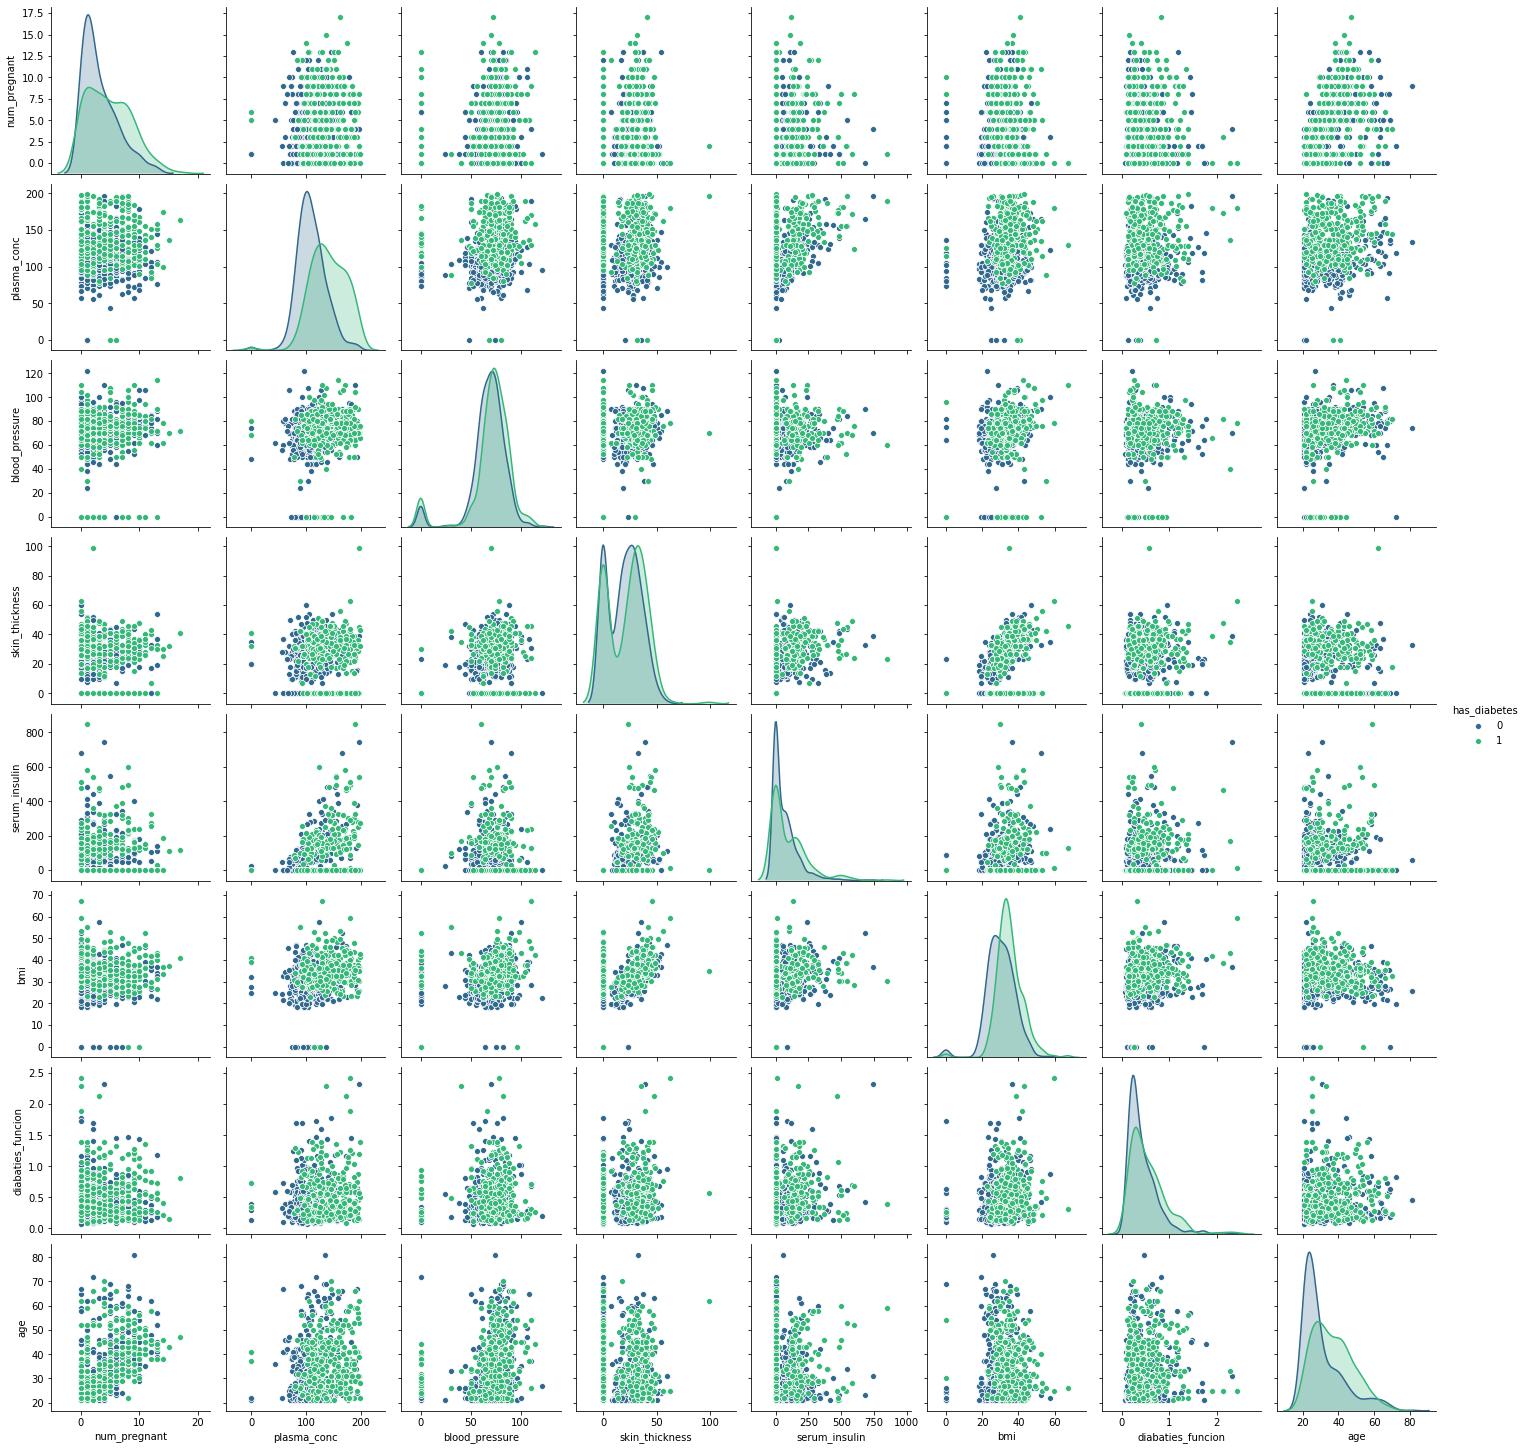

In [45]:
sns.pairplot(data,hue='has_diabetes',palette='viridis')
plt.show()